In [4]:
# Import our dependencies
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
#import matplotlib as plt
#import tensorflow as tf

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
import psycopg2

In [5]:
#import connection string (youll need to create this)
from config import conn

# create the engine
engine = create_engine(conn)
Base = automap_base()

# reflect an existing database into a new model
Base.prepare(engine, reflect=True)

# reflect the tables
us_data = Base.classes.us_data_df
#Historical_Price = Base.classes.historical_price_by_day

In [6]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [7]:
#create df from Recession_Indicator table
results = []

results = session.query(us_data.intdate, \
                        us_data.recession_indicator, \
                        #us_data.country, \
                        us_data.spy_open, \
                        us_data.spy_high, \
                        us_data.spy_low, \
                        us_data.spy_close, \
                        us_data.spx_open, \
                        us_data.spx_high, \
                        us_data.spx_low, \
                        us_data.spx_close, \
                        us_data.dji_open, \
                        us_data.dji_high, \
                        us_data.dji_low, \
                        us_data.dji_close, \
                        us_data.cpi, \
                        us_data.gdp, \
                        us_data.inflation, \
                        us_data.unemployment)


data_df = pd.DataFrame(results)
data_df.head()

,intdate,recession_indicator,spy_open,spy_high,spy_low,spy_close,spx_open,spx_high,spx_low,spx_close,dji_open,dji_high,dji_low,dji_close,cpi,gdp,inflation,unemployment
0,19700101,True,None,None,None,None,None,None,None,None,None,None,None,None,15.990414,1051.2,5.838255,3.873711
1,19700102,True,None,None,None,None,None,None,None,None,None,None,None,None,15.990414,1051.2,5.838255,4.213119
2,19700103,True,None,None,None,None,None,None,None,None,None,None,None,None,15.990414,1051.2,5.838255,4.394145
3,19700104,True,None,None,None,None,None,None,None,None,None,None,None,None,15.990414,1051.2,5.838255,4.636633
4,19700105,True,None,None,None,None,None,None,None,None,None,None,None,None,15.990414,1051.2,5.838255,4.715396


In [8]:
# Import our input dataset
#data_df = pd.read_csv('us_data_df.csv')
# Fill in the empty rows with "0". (4.5.2)
#data_df.fillna(0)
data_df = data_df.dropna()
data_df.head()

,intdate,recession_indicator,spy_open,spy_high,spy_low,spy_close,spx_open,spx_high,spx_low,spx_close,dji_open,dji_high,dji_low,dji_close,cpi,gdp,inflation,unemployment
11343,20010102,True,132.00000000,132.16000000,127.56000000,128.81000000,1283.27000000,1320.28000000,1276.05000000,1283.27000000,10790.92000000,10916.98000000,10450.55000000,10646.15000000,74.087513,10472.879,2.826171,4.262571
11344,20010103,True,128.31000000,136.00000000,127.66000000,135.00000000,1347.56000000,1347.76000000,1274.62000000,1347.56000000,10637.42000000,11212.62000000,10367.19000000,10945.75000000,74.087513,10472.879,2.826171,4.371051
11345,20010104,True,134.94000000,135.47000000,133.00000000,133.55000000,1333.34000000,1350.24000000,1329.14000000,1333.34000000,10944.94000000,11224.41000000,10672.59000000,10912.41000000,74.087513,10472.879,2.826171,4.474829
11346,20010105,True,133.47000000,133.63000000,129.19000000,129.19000000,1298.35000000,1334.77000000,1294.95000000,1298.35000000,10912.81000000,10990.59000000,10492.84000000,10662.01000000,74.087513,10472.879,2.826171,4.428656
11349,20010108,True,129.88000000,130.19000000,127.69000000,130.19000000,1295.86000000,1298.35000000,1276.29000000,1295.86000000,10658.73000000,10818.98000000,10407.85000000,10621.35000000,74.087513,10472.879,2.826171,4.983218


In [9]:
# convert to float
data_df[['spy_open','spy_high','spy_low','spy_close','spx_open','spx_high','spx_low','spx_close','dji_open','dji_high','dji_low','dji_close']] = data_df[['spy_open','spy_high','spy_low','spy_close','spx_open','spx_high','spx_low','spx_close','dji_open','dji_high','dji_low','dji_close']].astype(float)

data_df = pd.get_dummies(data_df, columns=["recession_indicator"])

In [10]:
data_df = data_df.drop({"recession_indicator_False"}, axis=1)
data_df.dtypes

intdate                       int64
spy_open                    float64
spy_high                    float64
spy_low                     float64
spy_close                   float64
spx_open                    float64
spx_high                    float64
spx_low                     float64
spx_close                   float64
dji_open                    float64
dji_high                    float64
dji_low                     float64
dji_close                   float64
cpi                         float64
gdp                         float64
inflation                   float64
unemployment                float64
recession_indicator_True      uint8
dtype: object

In [11]:
# Define the features set.
X = data_df.copy()
X = X.drop({"recession_indicator_True"}, axis=1)

# Fill in the empty rows with "0". (4.5.2)
#X.fillna(0)


X.head()

,intdate,spy_open,spy_high,spy_low,spy_close,spx_open,spx_high,spx_low,spx_close,dji_open,dji_high,dji_low,dji_close,cpi,gdp,inflation,unemployment
11343,20010102,132.00,132.16,127.56,128.81,1283.27,1320.28,1276.05,1283.27,10790.92,10916.98,10450.55,10646.15,74.087513,10472.879,2.826171,4.262571
11344,20010103,128.31,136.00,127.66,135.00,1347.56,1347.76,1274.62,1347.56,10637.42,11212.62,10367.19,10945.75,74.087513,10472.879,2.826171,4.371051
11345,20010104,134.94,135.47,133.00,133.55,1333.34,1350.24,1329.14,1333.34,10944.94,11224.41,10672.59,10912.41,74.087513,10472.879,2.826171,4.474829
11346,20010105,133.47,133.63,129.19,129.19,1298.35,1334.77,1294.95,1298.35,10912.81,10990.59,10492.84,10662.01,74.087513,10472.879,2.826171,4.428656
11349,20010108,129.88,130.19,127.69,130.19,1295.86,1298.35,1276.29,1295.86,10658.73,10818.98,10407.85,10621.35,74.087513,10472.879,2.826171,4.983218


In [13]:
# Define the target set.
y = data_df["recession_indicator_True"].ravel()
#y = pd.get_dummies(y, columns=["recession_indicator"])
#y = y.drop({"False"}, axis=1)
#y = z["True"]
#y.drop(['False'], axis=1)
y[:5]
#dtypes(y)

array([1, 1, 1, 1, 1], dtype=uint8)

In [14]:
# Splitting into Train and Test sets. (17.8.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
print(X_train)

        intdate  spy_open  spy_high  spy_low  spy_close  spx_open  spx_high  \
16110  20140110    183.95    184.22   183.01     184.14   1840.06   1843.15   
11351  20010109    131.05    131.50   129.42     129.84   1300.80   1311.72   
17201  20170105    226.27    226.58   225.48     226.40   2268.18   2271.50   
11717  20020111    116.21    116.28   114.70     114.94   1145.60   1159.41   
13186  20060112    129.08    129.28   128.44     128.80   1286.06   1294.18   
...         ...       ...       ...      ...        ...       ...       ...   
16835  20160105    201.40    201.90   200.05     201.36   2013.78   2021.94   
12450  20040109    112.83    113.50   112.27     112.39   1121.86   1131.92   
13553  20070112    142.15    143.24   142.11     143.24   1430.73   1431.23   
16107  20140108    183.45    183.83   182.89     183.52   1837.90   1840.02   
13177  20060104    126.86    127.49   126.70     127.30   1273.46   1275.37   

       spx_low  spx_close  dji_open  dji_high   dji

In [15]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier. (17.8.3)
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)
print(predictions)

[0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1]


In [17]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,16,0
Actual 1,0,19


In [18]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,16,0
Actual 1,0,19


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        19

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [19]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_

# We can sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.1330468483163637, 'inflation'),
 (0.11042126721443501, 'dji_low'),
 (0.08722693599669588, 'dji_open'),
 (0.07968057203271489, 'cpi'),
 (0.07959125715402017, 'dji_high'),
 (0.07729653574239488, 'intdate'),
 (0.0714640965540388, 'dji_close'),
 (0.07039910209566266, 'gdp'),
 (0.04197552036990593, 'spx_high'),
 (0.03835500860233211, 'spy_high'),
 (0.03506164749392522, 'spy_close'),
 (0.033914115513277984, 'spy_open'),
 (0.03296080058027342, 'spx_open'),
 (0.03017731254943153, 'spx_close'),
 (0.029234887739159814, 'spx_low'),
 (0.026743604541315226, 'spy_low'),
 (0.02245048750405271, 'unemployment')]

In [20]:
import seaborn as sns
import matplotlib as plt

#set the font for matplotlib
from matplotlib import style
style.use('fivethirtyeight')

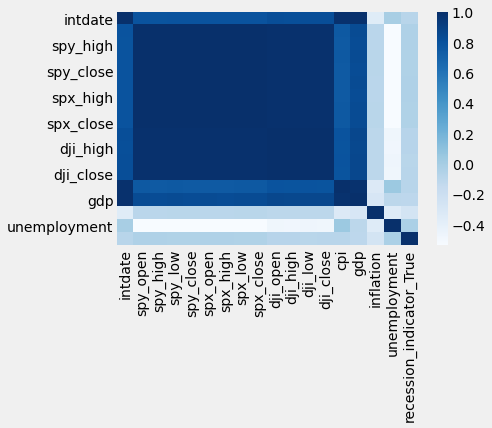

In [22]:
from matplotlib import figure
#plt.figure(figsize=(10,10))
figure.Figure(figsize=(10,20))
sns.heatmap(data_df.corr(),cmap='Blues',annot=False)